Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Below, please fill in your name and collaborators:

# <font color='Blue'> Group 5 Assignment - Predict Future Sales </font>


In [1]:
NAME = "Group 5"
COLLABORATORS = "Adejobi, Temidayo ; Koffi, Beniamkem ; Kovtun, Oksana ; Luo, Haiming ; Parra, Karen ;Vaithianathan, Elanchezhian"

## <font color='Blue'>Assignment tasks</font>

Group assignment objectivie is to showcase what is learned in the course. Group shall able to choose which type of analysis they would like to complete from the options below.

Choose one of the following for your project:

1. Make a hypothesis about a correlation in a dataset and test the hypothesis using a statistical inference technique (such as the t-test).
2. Build a predictive model using one of the techniques covered in the course, i.e., ordinary least squares regression or Naïve Bayes.

<font color = 'Blue'>The dataset chosen on which the analysis is "Predict Future Sales" dataset.</font>    

The dataset was downloaded from the public dataset on Kaggle at the url, https://www.kaggle.com/c/competitive-data-science-predict-future-sales/data

The dataset is being used under the terms of the licence below.

License: This work is licensed under the Creative Commons Attribution 3.0 Unported License. To view a copy of this license, visit http://creativecommons.org/licenses/by/3.0/.

# <font color='Blue'>1. Data preparation</font>


In [1]:
# import libs
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import seaborn as sns
from scipy import stats
from statsmodels.tools.eval_measures import rmse

%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
#from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix

Brief note of the dataset is provided below. Predict future sales dataset cons assignment objectivie is to showcase what is learned in the course. Group shall able to choose which type of analysis they would like to complete from the options below.

Choose one of the following for your project:

1. sales_train_v2.csv - Main dataset that provides the sales data per month and would be use to train the model.
2. shops.csv - Shop id to shop name
3. item_categories.csv - Item category id to Item category name
4. items.csv - Item id to Item name.
5. test.csv - dataset that would be used to test the model.

## 1.1 Loading the dataset

In [2]:
# Read dataset file that was donwloaded
#sales_dirty_df = pd.read_csv(filepath_or_buffer='sales_train_v2.csv', sep=',')
sales_train_df = pd.read_csv('sales_train_v2.csv', sep=',',header=0)

shops_df = pd.read_csv('shops.csv', sep=',',header=0)
item_category_df = pd.read_csv('item_categories.csv', sep=',',header=0)
items_df = pd.read_csv('items.csv', sep=',',header=0)
test_df = pd.read_csv('test.csv', sep=',',header=0)


## 1.2 Analyse the dataset 'sales_train_v2.csv'

### 1.2.1 Basic inspection of the original dataset

In [4]:
# View info()
sales_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [16]:
sales_train_df.dropna(inplace=True)

In [17]:
# view tail of data# view head 
sales_train_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [18]:
# view tail of data
sales_train_df.tail()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2935844,10.10.2015,33,25,7409,299.0,1.0
2935845,09.10.2015,33,25,7460,299.0,1.0
2935846,14.10.2015,33,25,7459,349.0,1.0
2935847,22.10.2015,33,25,7440,299.0,1.0
2935848,03.10.2015,33,25,7460,299.0,1.0


### 1.2.2 Basic inspection of the supporting dataset

In [19]:
# Analyzing items dataset
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
item_name           22170 non-null object
item_id             22170 non-null int64
item_category_id    22170 non-null int64
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


In [9]:
# Analyzing Shops dataset
shops_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
shop_name    60 non-null object
shop_id      60 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.0+ KB


In [10]:
# Analyzing Items category dataset
item_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
item_category_name    84 non-null object
item_category_id      84 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [11]:
# Analyzing test dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
ID         214200 non-null int64
shop_id    214200 non-null int64
item_id    214200 non-null int64
dtypes: int64(3)
memory usage: 4.9 MB


### 1.3 Data cleansing and transformation

In [3]:
# Split the date into day, month and year to facilitate deeper interpretation.

raw_date = sales_train_df.date.apply(lambda x:datetime.datetime.strptime(x, '%d.%m.%Y'))

sales_train_df['day'] = raw_date.dt.day
sales_train_df['month'] = raw_date.dt.month
sales_train_df['year'] = raw_date.dt.year

sales_train_df.head()


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year
0,02.01.2013,0,59,22154,999.00,1.0,2,1,2013
1,03.01.2013,0,25,2552,899.00,1.0,3,1,2013
2,05.01.2013,0,25,2552,899.00,-1.0,5,1,2013
3,06.01.2013,0,25,2554,1709.05,1.0,6,1,2013
4,15.01.2013,0,25,2555,1099.00,1.0,15,1,2013


In [4]:
# calculate the sales store per month
sales_train_df['sales']=sales_train_df.item_price*sales_train_df.item_cnt_day

In [5]:
# Add item category to the sales train dataset
sales_train_df = pd.merge(sales_train_df,items_df, on='item_id')
sales_train_df.drop('item_name', axis=1,inplace=True)

In [6]:
#sales_train_df.head()

new_sales_train=sales_train_df
new_sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year,sales,item_category_id
0,02.01.2013,0,59,22154,999.0,1.0,2,1,2013,999.0,37
1,23.01.2013,0,24,22154,999.0,1.0,23,1,2013,999.0,37
2,20.01.2013,0,27,22154,999.0,1.0,20,1,2013,999.0,37
3,02.01.2013,0,25,22154,999.0,1.0,2,1,2013,999.0,37
4,03.01.2013,0,25,22154,999.0,1.0,3,1,2013,999.0,37


# <font color='Blue'>2. Feature Analysis: </font>

### 2.1 Seasonality Summary

In [26]:
sales_train_df['sales'].describe()

count    2.935849e+06
mean     1.157732e+03
std      5.683604e+03
min     -6.897000e+04
25%      2.490000e+02
50%      4.490000e+02
75%      1.078200e+03
max      1.829990e+06
Name: sales, dtype: float64

year
2013    1.217525e+09
2014    1.346778e+09
2015    8.346231e+08
Name: sales, dtype: float64

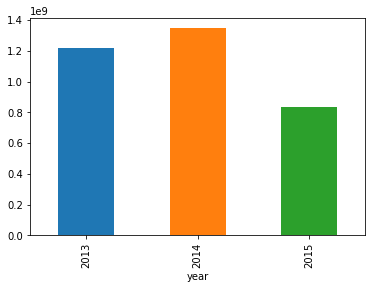

In [17]:
#Sales Group by Year
Sales_by_year = sales_train_df.groupby('year')['sales'].sum()
display(Sales_by_year)
Sales_by_year.plot.bar()

Text(0.5,1,'Sales by Year')

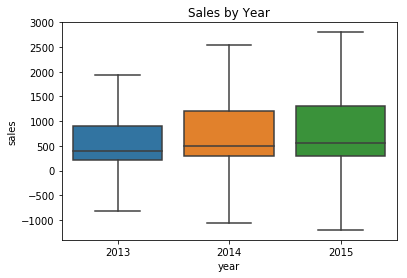

In [18]:
sns.boxplot(x="year", y="sales", data=sales_train_df, showfliers=False).set_title('Sales by Year')

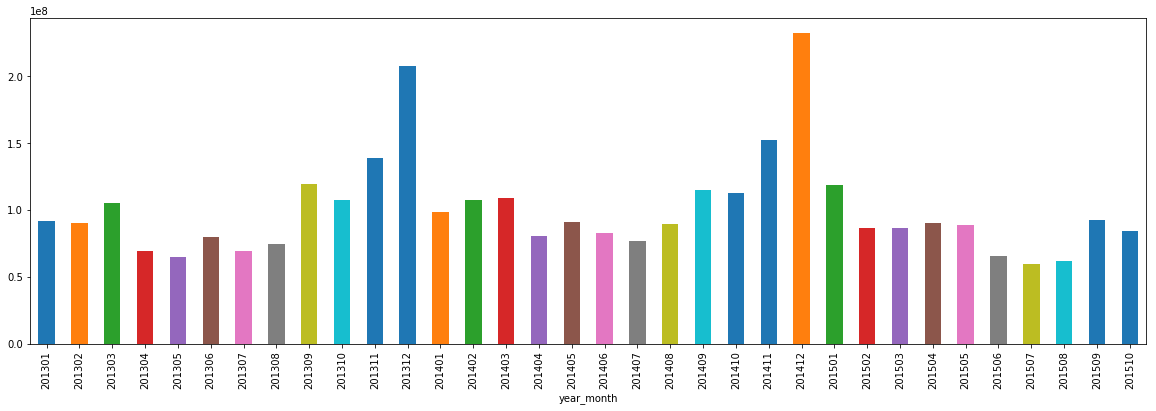

In [19]:
#Sales Group by Year and Month
sales_train_df['year_month'] =sales_train_df['year']*100 + sales_train_df['month']
Sales_by_Month = sales_train_df.groupby('year_month')['sales'].sum()
Sales_by_Month.plot.bar(figsize=(20, 6), subplots=False)

Text(0.5,1,'Sales by Year and Month')

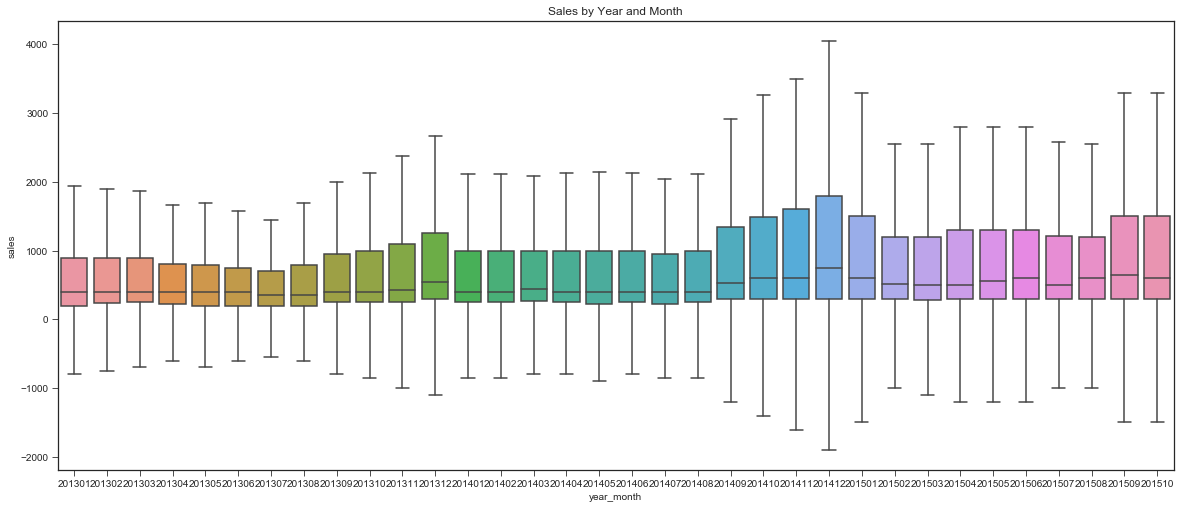

In [40]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(20, 8.27)
sns.boxplot(x="year_month", y="sales", data=sales_train_df, showfliers=False).set_title('Sales by Year and Month')

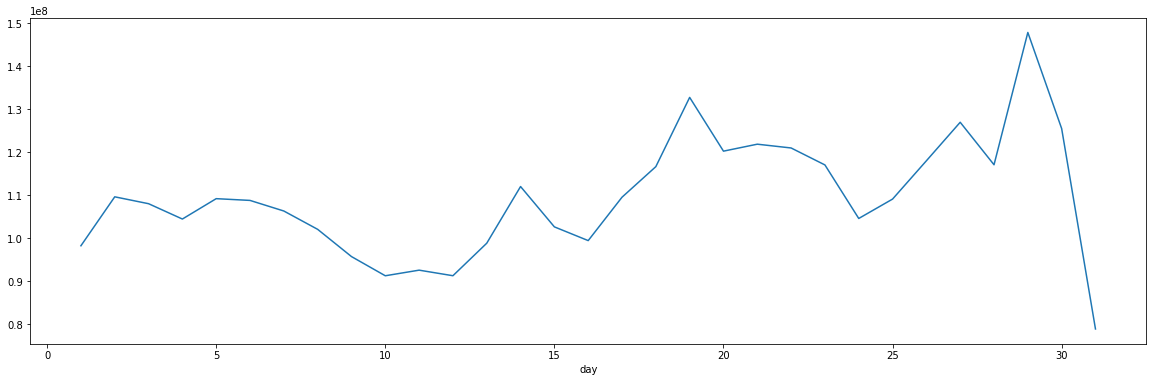

In [21]:
#Sales Group by day 
Sales_by_day = sales_train_df.groupby('day')['sales'].sum()
Sales_by_day.plot.line(figsize=(20, 6), subplots=False)

Text(0.5,1,'Sales by day')

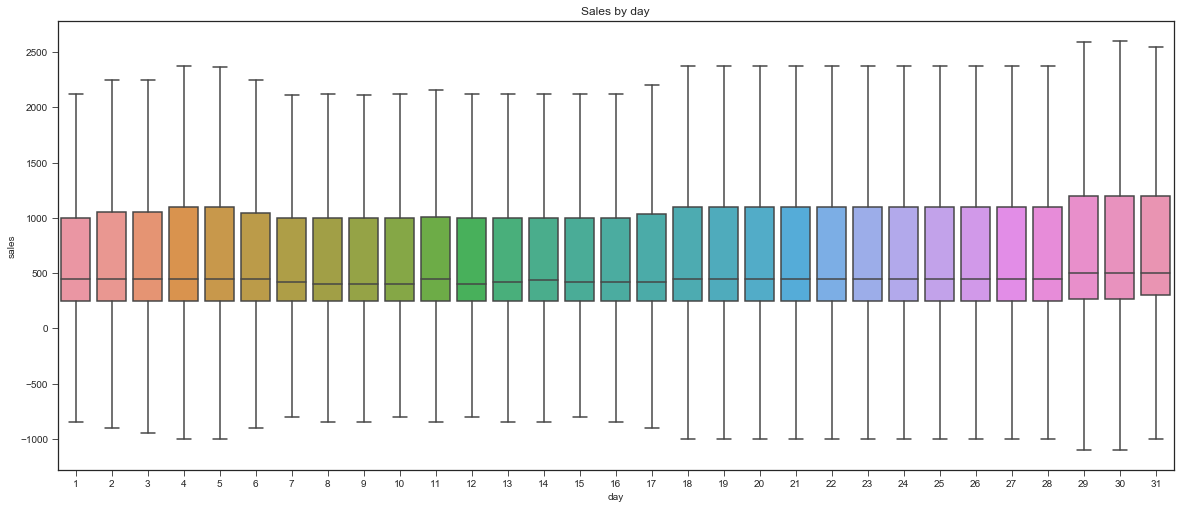

In [41]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(20, 8.27)
sns.boxplot(x="day", y="sales", data=sales_train_df, showfliers=False).set_title('Sales by day')

### 2.2 Sales and Volume Distribution by Shop 

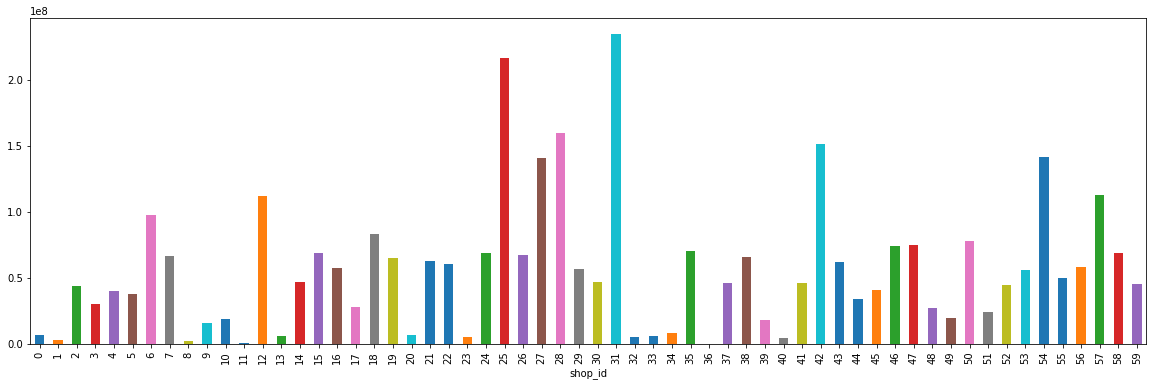

In [23]:
#Sales Group by Shop ID 
Sales_by_Shop = sales_train_df.groupby('shop_id')['sales'].sum()
Sales_by_Shop.plot.bar(figsize=(20, 6), subplots=False)

Text(0.5,1,'Sales by shop_id')

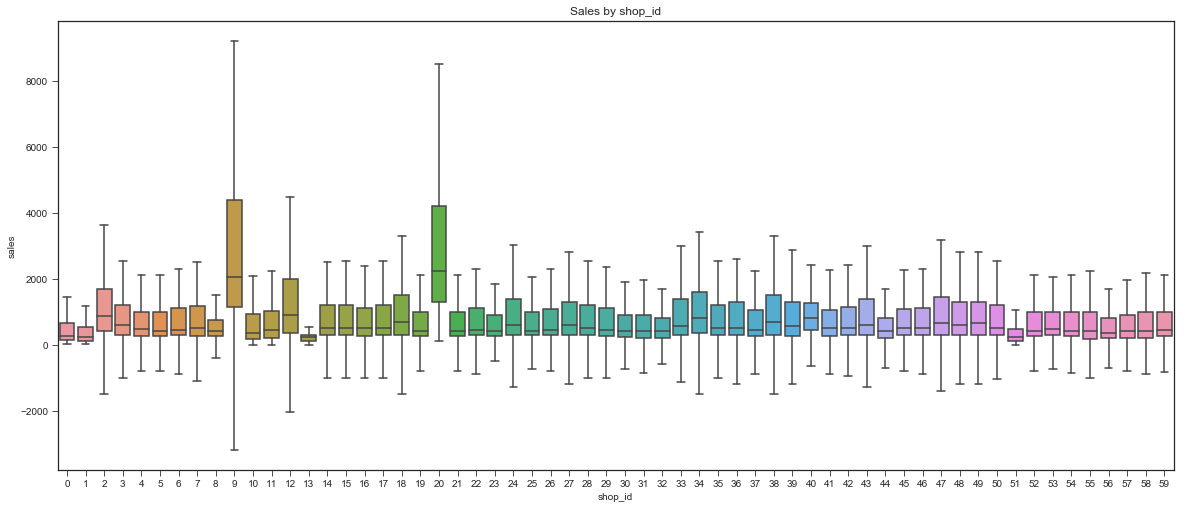

In [42]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(20, 8.27)
sns.boxplot(x="shop_id", y="sales", data=sales_train_df, showfliers=False).set_title('Sales by shop_id')

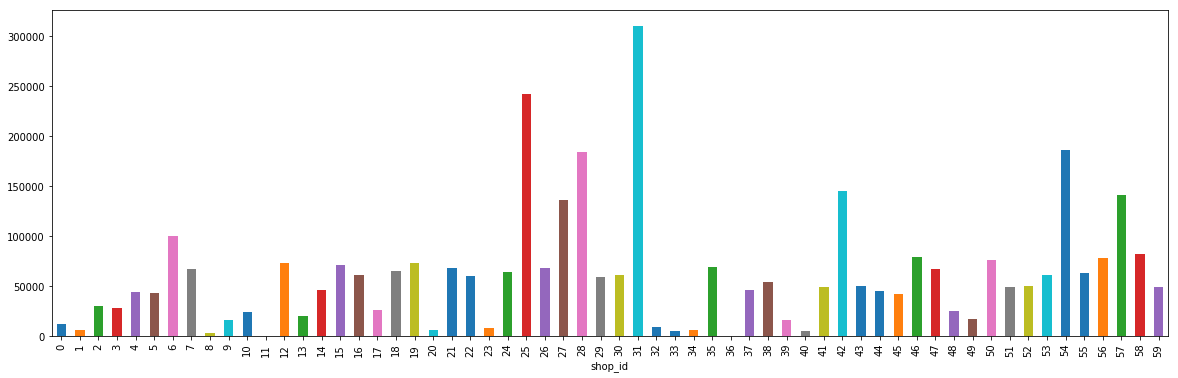

In [25]:
#Volume Group by Shop ID 
Volume_by_Shop = sales_train_df.groupby('shop_id')['item_cnt_day'].sum()
Volume_by_Shop.plot.bar(figsize=(20, 6), subplots=False)

### 2.3 Sales and Volume Distribution by item category

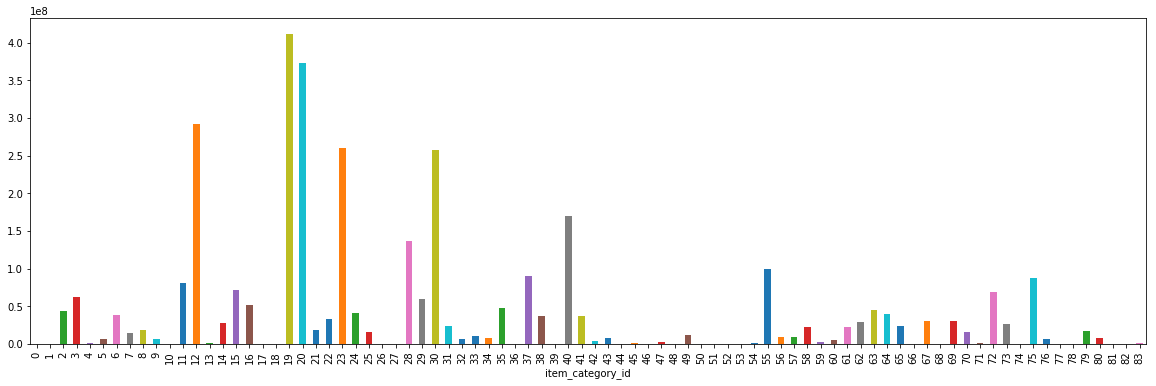

In [27]:
#Sales Group by item_category_id  
Sales_by_item_category = sales_train_df.groupby('item_category_id')['sales'].sum()
Sales_by_item_category.plot.bar(figsize=(20, 6), subplots=False)

Text(0.5,1,'Sales by item_category')

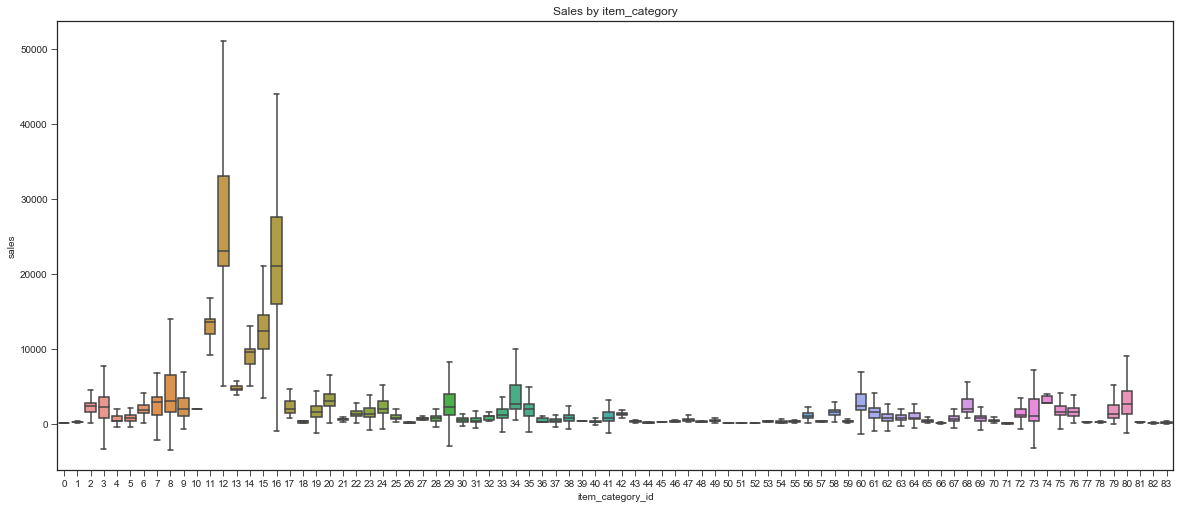

In [44]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(20, 8.27)
sns.boxplot(x="item_category_id", y="sales", data=sales_train_df, showfliers=False).set_title('Sales by item_category')

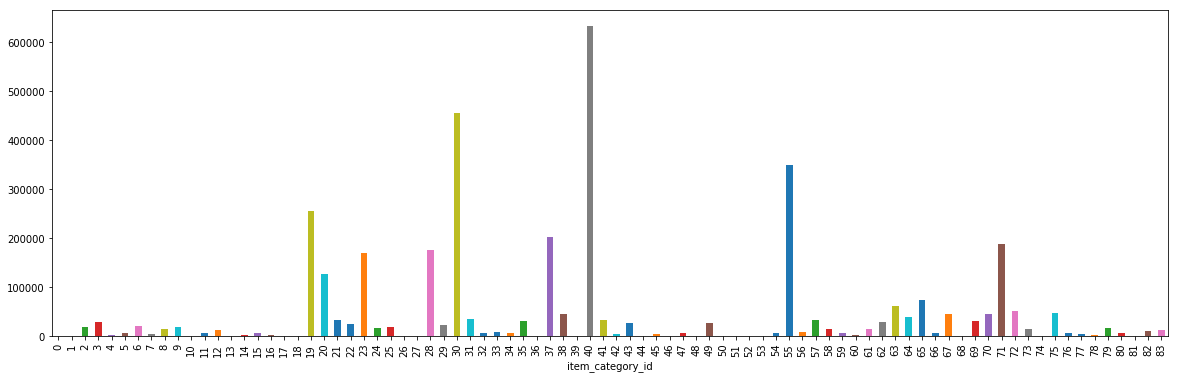

In [28]:
#Volume Group by item_category_id 
Volume_by_item_category = sales_train_df.groupby('item_category_id')['item_cnt_day'].sum()
Volume_by_item_category.plot.bar(figsize=(20, 6), subplots=False)

### 2.4 Shops and Item Variety 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FF17504E48>],
      dtype=object)

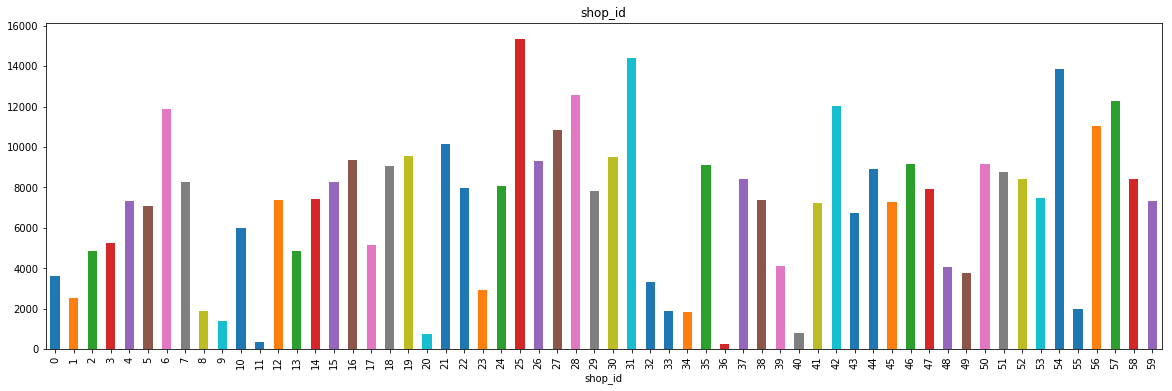

In [29]:
#check each shop's number of unque item ID 
shop_by_item_variety = sales_train_df[['shop_id','item_id']].drop_duplicates()
shop_by_item_variety_count = shop_by_item_variety.groupby('shop_id')['shop_id'].count()
shop_by_item_variety_count.plot.bar(figsize=(20, 6), subplots=True)

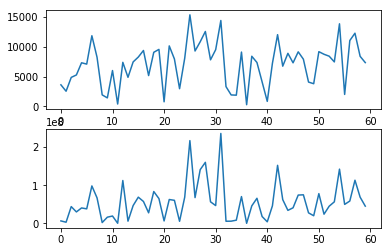

In [30]:
#check if the shops with more unique item number has more sales
plt.figure()
f, axes = plt.subplots(2, 1)
axes[0].plot(shop_by_item_variety_count)
axes[1].plot(Sales_by_Shop)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FF17A458D0>],
      dtype=object)

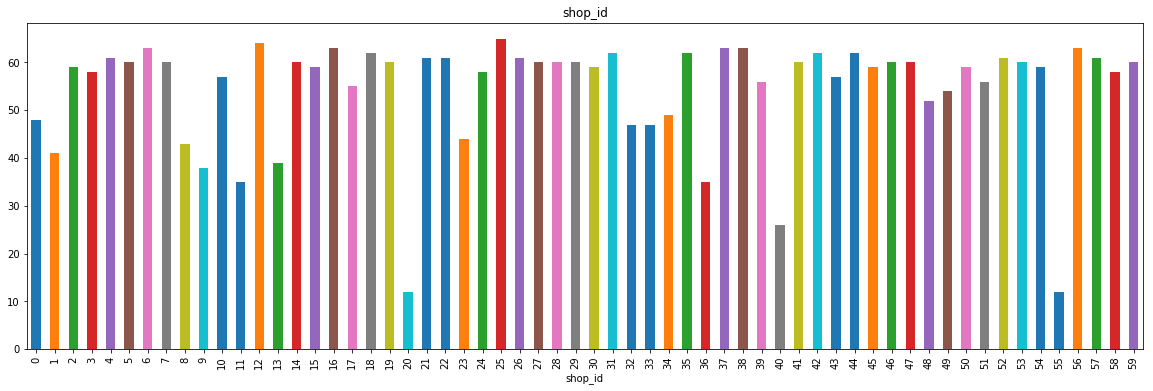

In [31]:
#check each shop's number of item category 
shop_by_item_cat = sales_train_df[['shop_id','item_category_id']].drop_duplicates()
shop_by_item_cat_count = shop_by_item_cat.groupby('shop_id')['shop_id'].count()
shop_by_item_cat_count.plot.bar(figsize=(20, 6), subplots=True)

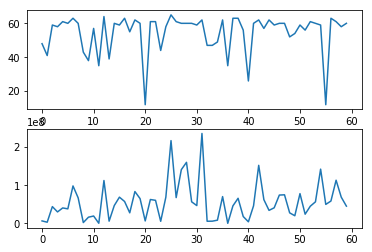

In [32]:
#check if the shops with more unique item category has more sales
plt.figure()
f, axes = plt.subplots(2, 1)
axes[0].plot(shop_by_item_cat_count)
axes[1].plot(Sales_by_Shop)


### 2.5 Scatter Matrix  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FF20671668>,
      dtype=object)

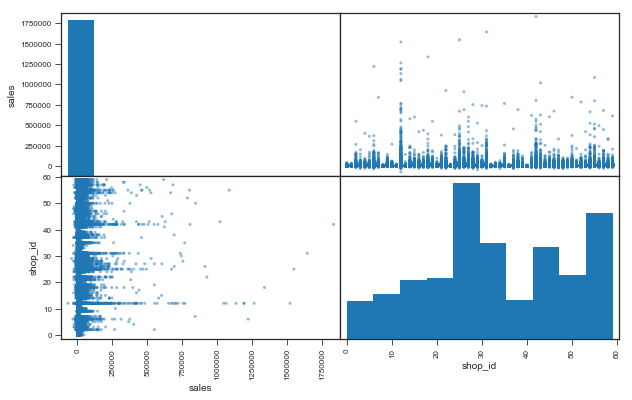

In [46]:
scatter_matrix(sales_train_df[['sales','shop_id']],figsize=(10, 6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FF49451F28>,
      dtype=object)

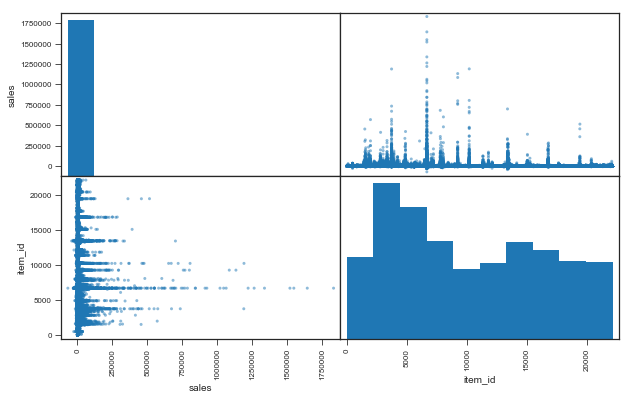

In [47]:
scatter_matrix(sales_train_df[['sales','item_id']],figsize=(10, 6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FF63222A58>,
      dtype=object)

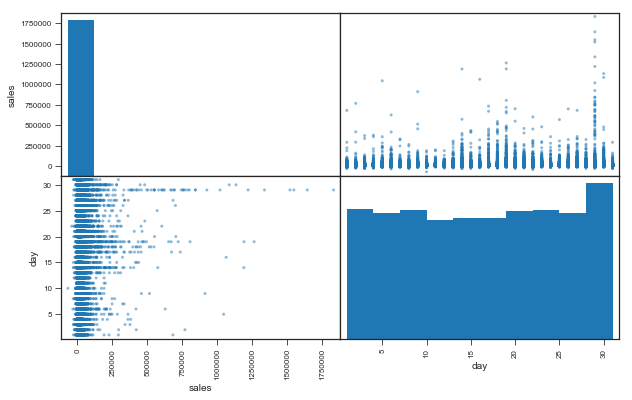

In [48]:
scatter_matrix(sales_train_df[['sales','day']],figsize=(10, 6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FF63334358>,
      dtype=object)

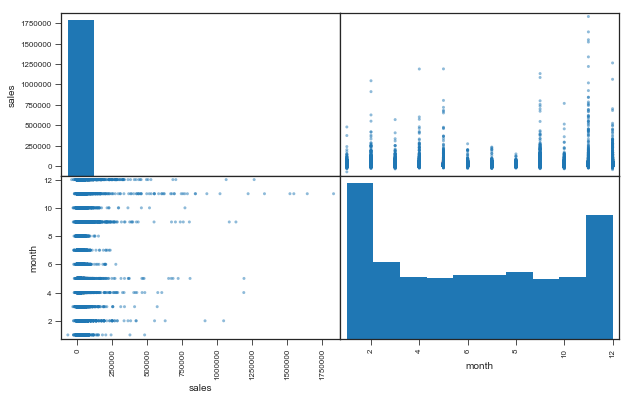

In [49]:
scatter_matrix(sales_train_df[['sales','month']],figsize=(10, 6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FF22418B70>,
      dtype=object)

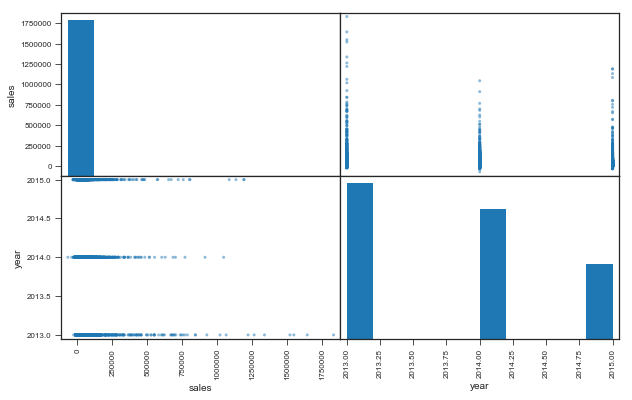

In [50]:
scatter_matrix(sales_train_df[['sales','year']],figsize=(10, 6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FF63713358>,
      dtype=object)

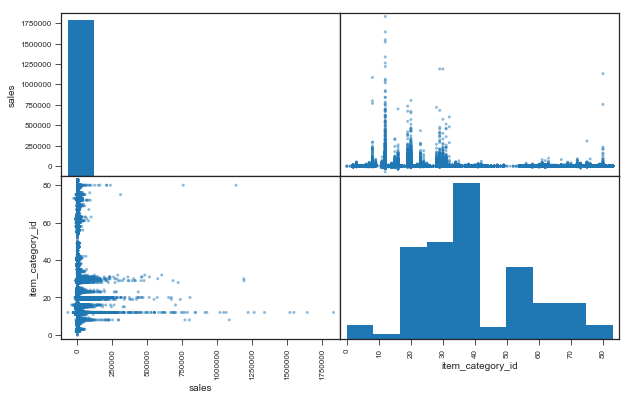

In [51]:
scatter_matrix(sales_train_df[['sales','item_category_id']],figsize=(10, 6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FF4C5FD4A8>,
      dtype=object)

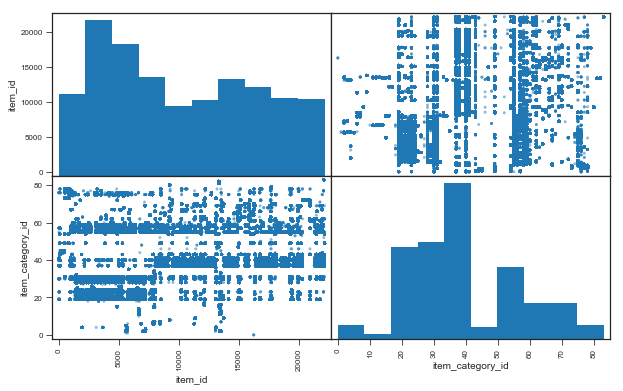

In [52]:
scatter_matrix(sales_train_df[['item_id','item_category_id']],figsize=(10, 6))

Model performance DRAFT(to be adjusted once part 3 is submitted)

using a ARIMA model
ARIMA, short for ‘AutoRegressive Integrated Moving Average’, is a forecasting algorithm based on the idea that the information in the past values of the time series can alone be used to predict the future values.

In [23]:
#let estimate my P,Q, M values for arima

#%pip install pmdarima
import pmdarima as pm
from pmdarima.arima.utils import ndiffs


y = new_sales_train.sales

## Adf Test
print(ndiffs(y, test='adf') ) # 1

# KPSS test
print(ndiffs(y, test='kpss'))  # 0

# PP test:
ndiffs(y, test='pp')  # 1

0
1


0

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import Series


# 1,0,1 ARIMA Model
model = ARIMA(new_sales_train.sales, order=(3,2,1))
model_fit = model.fit(disp=0)
model_fit.summary()
#summary(model_fit)

In [ ]:
from statsmodels.tsa.stattools import acf
#cross-validation with the training and testing time series into 2 contiguous parts in approximately 75:25 ratio 
#
#
# Create Training and Test
train = new_sales_train.sales[:85]
test = new_sales_train.sales[85:]

In [ ]:
#  Forecast Performance Measure
#Forecast
fc, se, conf = model_fit.forecast(15, alpha=0.05)  # 95% conf
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

In [ ]:
model_fit.plot_diagnostics(figsize=(7,5))
plt.show()

mape at 2.2% means the model is 97.85% accurate
MSE at 

In [ ]:
# Accuracy of the Model

